# Famous Last Words
The dataset documents Texas death row inmates executed from 1976, when the Supreme Court reinstated the death penalty, to the present. It was extracted from the Texas Department of Criminal Justice website.

Source: https://selectstarsql.com/frontmatter.html#dataset

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np
import nltk
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator

%matplotlib inline

In [2]:
df = pd.read_csv("tx_deathrow_full.csv")

In [3]:
df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ Number,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


In [4]:
df.dtypes

Execution                    int64
Date of Birth               object
Date of Offence             object
Highest Education Level    float64
Last Name                   object
First Name                  object
TDCJ\nNumber                 int64
Age at Execution             int64
Date Received               object
Execution Date              object
Race                        object
County                      object
Eye Color                   object
Weight                     float64
Height                      object
Native County               object
Native State                object
Last Statement              object
dtype: object

## Youngest Inmates Executed

In [5]:
df["Full Name"] = df['First Name'] + " " + df['Last Name']

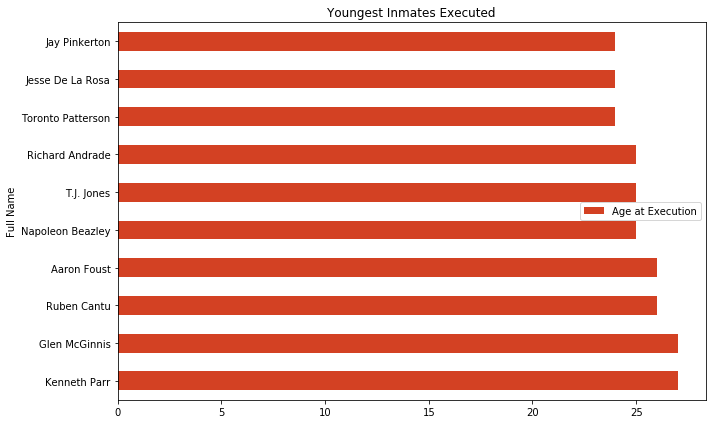

In [9]:
young = df.sort_values(by='Age at Execution', ascending=True).head(10)
young.sort_values(by='Age at Execution', ascending=False).plot(x='Full Name', 
                                                               y='Age at Execution', 
                                                               kind='barh', 
                                                               figsize=(10, 6),
                                                               title="Youngest Inmates Executed",
                                                               color="#D34123")
plt.tight_layout()
plt.savefig("young.pdf")

## Year with the Most Executions


In [26]:
#Make a year only column
df['Year'] = df['Execution Date'].str.replace('(-.*)', '', regex = True).astype(int)

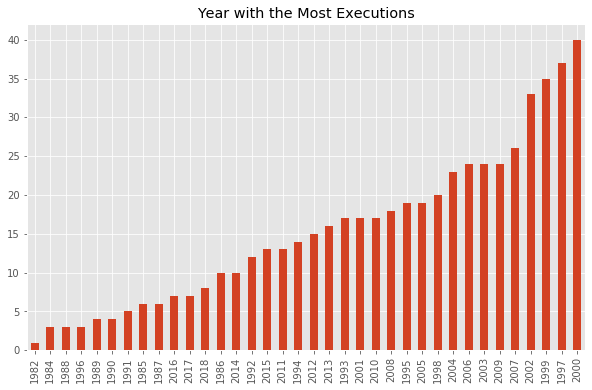

In [27]:
df['Year'].value_counts(ascending=True).plot(kind='bar', 
                                             figsize=(10, 6),
                                             title="Year with the Most Executions",
                                             color="#D34123")

In [10]:
df['Year'].value_counts()

2000    40
1997    37
1999    35
2002    33
2007    26
2009    24
2003    24
2006    24
2004    23
1998    20
2005    19
1995    19
2008    18
2010    17
2001    17
1993    17
2013    16
2012    15
1994    14
2011    13
2015    13
1992    12
2014    10
1986    10
2018     8
2017     7
2016     7
1987     6
1985     6
1991     5
1990     4
1989     4
1996     3
1988     3
1984     3
1982     1
Name: Year, dtype: int64

## Executions by race 
#### Pie Chart


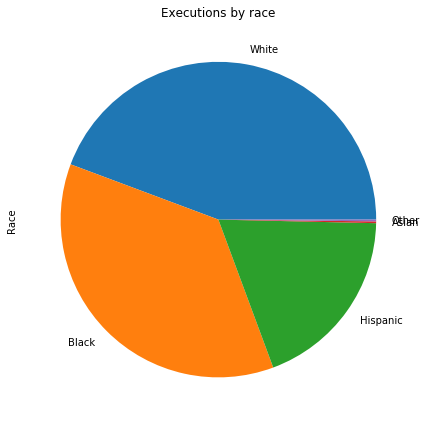

In [18]:
race = df['Race'].value_counts(normalize=True) * 100
race.plot(kind='pie', figsize=(10, 6), title="Executions by race")
plt.tight_layout()
plt.savefig("race.pdf")

In [16]:
race

White       44.303797
Black       36.347197
Hispanic    18.987342
Asian        0.180832
Other        0.180832
Name: Race, dtype: float64

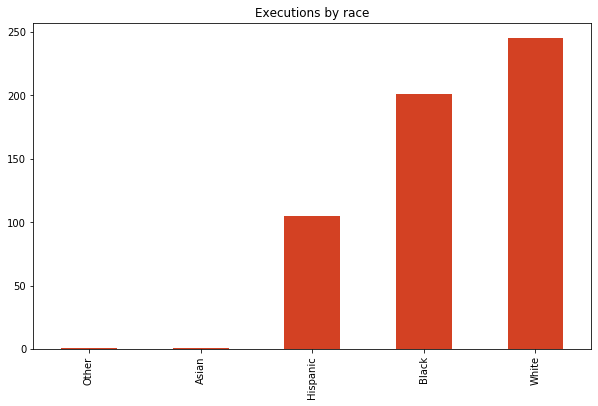

In [17]:
df['Race'].value_counts(ascending=True).plot(kind='bar',
                                             figsize=(10, 6),
                                             title="Executions by race",
                                             color="#D34123")

## Most common level of education


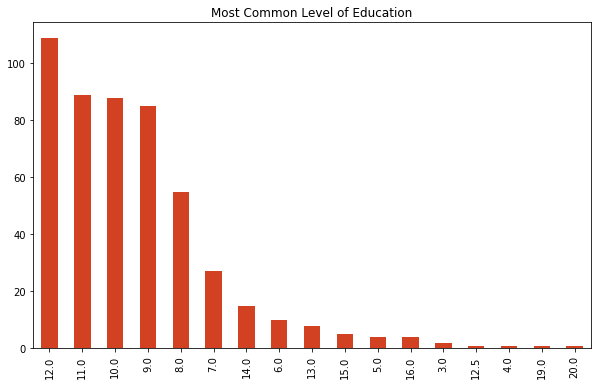

In [12]:
df['Highest Education Level'].value_counts().plot(kind='bar', 
                                                  figsize=(10, 6),
                                                  title="Most Common Level of Education",
                                                  color="#D34123")

## Most common (unique) last words
### Word Cloud

In [13]:
df['Last Statement'].str.split(expand=True).stack().value_counts()


I                3425
to               1634
and              1380
the              1282
you              1189
my                895
for               838
that              751
love              721
of                718
all               557
am                525
have              515
a                 507
is                500
in                491
me                393
your              322
know              317
not               315
will              314
be                306
you.              290
this              278
it                246
want              245
would             242
with              238
like              236
me.               226
                 ... 
fantasy.            1
once.               1
surprised           1
road.               1
"Hi,                1
grain.              1
statement:)         1
unintentional       1
Strength            1
through,            1
Kindom's            1
y                   1
grass               1
Teach,              1
fourteen  

All frequencies, including STOPWORDS:
      Word  Frequency
0        .       4528
1        i       3765
2        ,       2528
3      you       1801
4       to       1787
5      and       1472
6      the       1371
7       my        953
8     that        908
9      for        875
10    love        789
11     all        739
12      of        721
13      me        691
14      am        536
15      is        529
16    have        528
17       a        521
18      in        510
19      it        495
20    this        421
21  family        361
22      do        350
23     not        349
24     n't        346
25    know        345
26      be        342
27    your        328
28    will        319
29      's        316


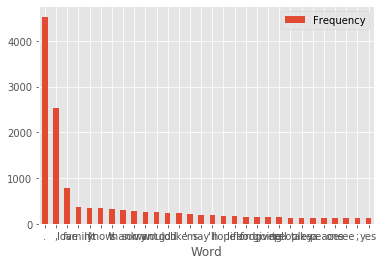

In [14]:
top_N = 30

txt = df['Last Statement'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

## Which county in Texas has the most death row inmates
#### Choropleth

In [15]:
texas = df[df['Native State'] == 'Texas']
texas['Native County'].value_counts()

Harris            74
Dallas            43
Bexar             30
Tarrant           26
Jefferson         10
Nueces             7
Potter             6
Travis             6
McLennan           6
Hidalgo            5
Lubbock            5
Brazos             5
Cameron            4
El Paso            4
Smith              4
Williamson         3
Wichita            3
Gregg              3
Lamar              3
Galveston          3
Navarro            2
Hays               2
Taylor             2
Wharton            2
Scurry             2
Anderson           2
Waller             2
Grimes             2
Nacoqdoches        2
Leon               2
                  ..
Grayson            1
Kaufman            1
Austin             1
Deaf Smith         1
Freestone          1
Cherokee           1
Dawson             1
Victoria           1
Bailey             1
Calhoun            1
Hunt County        1
Hutchinson         1
Ochiltree          1
Martin             1
Red River          1
Houston            1
Parmer       